#### 探索性数据分析（Exploratory Data Analysis）
  **数据探索** - 数据预处理 - 数据建模
  
**对数据进行全面的数据探索：**
- 理解问题：查看每个变量并且根据他们的意义和对问题的重要性进行哲学分析。

- 单因素研究：只关注因变量( target)，并且进行更深入的了解。

- 多因素研究：分析因变量和自变量之间的关系。

- 基础清洗：清洗数据集并且对缺失数据，异常值和分类数据进行一些处理。

- 检验假设：检查数据是否和多元分析方法的假设达到一致。
---
- 数据探索：数据质量分析和数据特征分析
 - 数据质量分析：缺失值、异常值、不一致值、重复值


In [1]:
# -*- coding: utf-8 -*-
# TODO:读取数据
import pandas as pd
target_url = ("D:/Personal/Desktop/zhengqi_train.txt")
zhengqi_train = pd.read_table(target_url, header=0, encoding="utf-8")
outputfile = "output.xls"

In [2]:
#TODO:设置pandas输出格式
pd.set_option('expand_frame_repr',False)
pd.set_option("display.max_columns",1000)
pd.set_option('display.max_rows',1000)

#### 数据质量分析
分析target（是否有缺失值、是否有异常值、不一致的值、属于什么分布）
1.缺失值（拿到数据之后，整体对数据进行缺失值检测）
2.异常值
3.一致性
##### 缺失值

In [3]:
'''
缺失值检测&处理（此处无空值，后续补充处理缺失值的方法）
包括对数据的基本描述，percentiles参数是指定计算多少的分位数表（如1/4分位数、中位数等）；
T是转置，转置后更方便查阅'''
explore = zhengqi_train.describe(percentiles = [], include = 'all').T

'''describe()函数自动计算非空值数，需要手动计算空值数'''
explore['null'] = len(zhengqi_train)-explore['count']
print(explore)

         count      mean       std     min     50%    max  null
V0      2888.0  0.123048  0.928031  -4.335  0.3590  2.121   0.0
V1      2888.0  0.056068  0.941515  -5.122  0.2725  1.918   0.0
V2      2888.0  0.289720  0.911236  -3.420  0.3860  2.828   0.0
V3      2888.0 -0.067790  0.970298  -3.956 -0.0445  2.457   0.0
V4      2888.0  0.012921  0.888377  -4.742  0.1100  2.689   0.0
V5      2888.0 -0.558565  0.517957  -2.182 -0.4660  0.489   0.0
V6      2888.0  0.182892  0.918054  -4.576  0.3880  1.895   0.0
V7      2888.0  0.116155  0.955116  -5.048  0.3440  1.918   0.0
V8      2888.0  0.177856  0.895444  -4.692  0.3620  2.245   0.0
V9      2888.0 -0.169452  0.953813 -12.891  0.0420  1.335   0.0
V10     2888.0  0.034319  0.968272  -2.584  0.1570  4.830   0.0
V11     2888.0 -0.364465  0.858504  -3.160 -0.1120  1.455   0.0
V12     2888.0  0.023177  0.894092  -5.165  0.1230  2.657   0.0
V13     2888.0  0.195738  0.922757  -3.675  0.2895  2.475   0.0
V14     2888.0  0.016081  1.015585  -2.4

In [4]:
'''1、缺失值'''
zhengqi_train['target'].describe(include='all').T

count    2888.000000
mean        0.126353
std         0.983966
min        -3.044000
25%        -0.350250
50%         0.313000
75%         0.793250
max         2.538000
Name: target, dtype: float64

##### 异常值检测
- 简单统计量：观察最大值、最小值判定变量的取值是否超过实际的范围(散点图更直观)
- 3∂原则：前提是数据服从正态分布，异常值为测定值中与平均值偏差超过3倍标准差的值；
若不符，可用远离平均值的多少倍标准差来描述
- 箱线图：上下四分位数偏离1.5倍四分位距，以外的值为异常值（鲁棒性、异常值不影响标准评定、常用）
- 基于模型检测
- 基于近邻度
- 基于密度的离群点检测
- 基于聚类方法


In [36]:
%matplotlib notebook
# TODO:设定图中文与负号正常显示
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

###### 使用散点图查看异常点

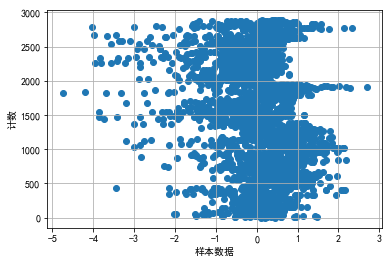

In [46]:
''' 使用散点图查看异常点'''
# plt.figure(figsize = (8,5)) # 创建图像区域，指定比例
scatter = plt.figure()

target = zhengqi_train['V4']
# plt.plot(range(1,2889),target)
# plt.show()
# target.plot()
plt.scatter(target,range(1,2889))
plt.grid(True) #显示网格线
plt.xlabel("样本数据")
plt.ylabel("计数")
plt.show()
# # plt.close()
# %matplotlib inline
# plt.show()

In [5]:


'''
1.2.2 3∂原则查看异常点
数据并不符合正态分布，可用直方图查看（后续有查看数据分布的方法）
'''
# TODO:直方图大致判定是否符合正态分布
import seaborn as sns
sns.distplot(zhengqi_train['target']) # 直方图
# plt.show()
plt.close()
target.plot(kind='hist') # 直方图
# plt.show()
plt.close()

# TODO:取得平均值和标准差
target_des = zhengqi_train['V9'].describe()
mean = target_des['mean']
std = target_des['std']

# TODO:计算target离群点,结果发现偏离程度都不大
list_point = zhengqi_train['target'][(zhengqi_train['target'] > mean+3*std) | (zhengqi_train['target'] < mean - 3*std)]
print(list_point)
print("mean: %f" % mean)
print("std: %f" % std)
print("和: %f" % float(mean + 3*std))
print("差: %f" % float(mean - 3*std))

'''
1.2.3 箱线图查看异常点
极端异常值，即超出四分位数差3倍距离的异常值，用空心点表示；
较为温和的异常值，即处于1.5倍-3倍四分位数差之间的异常值，用实心点表示。 
'''
# fig = plt.figure()
# ax1 = fig.add_subplot(2, 2, 1)
# ax2 = fig.add_subplot(2, 2, 2)
# ax3 = fig.add_subplot(2, 2, 3)
# ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
# ax2.boxplot(zhengqi_train['V1'])
# plt.plot(np.random.randn(50).cumsum(), 'k--')
# plt.show()
fig, axes = plt.subplots(3, 3)
k=1
for i in range(3):
    for j in range(3):
        varible = 'V' + str(k)
        axes[i][j].boxplot(zhengqi_train[varible])
        k =k+1
plt.subplots_adjust(wspace=0, hspace=0)
# plt.show()
plt.close()

data_frame = pd.DataFrame(zhengqi_train['target'])
p = zhengqi_train.boxplot(return_type='dict') # 画箱线图，直接使用DataFrame的方法
# p = zhengqi_train['target'].plot(kind='box') # 所有列的箱线图
x = p['fliers'][0].get_xdata() # 'flies'即为异常值的标签
y = p['fliers'][0].get_ydata()
y.sort() #从小到大排序，该方法直接改变原对象

'''用annotate添加注释
其中有些相近的点，注解会出现重叠，难以看清，需要一些技巧来控制。
以下参数都是经过调试的，需要具体问题具体调试。
'''
for i in range(len(x)):
  if i>0:
    plt.annotate(y[i], xy = (x[i],y[i]), xytext=(x[i]+0.05 -0.8/(y[i]-y[i-1]),y[i]))
  else:
    plt.annotate(y[i], xy = (x[i],y[i]), xytext=(x[i]+0.08,y[i]))
# plt.show() #展示箱线图
plt.close()

# TODO:计算分位数，找到异常值
abnormal_point = []
explore = zhengqi_train.describe()
zhengqi_train_quanti = zhengqi_train.copy()
outputfile = 'qutitle.xls'
for i in range(38):
    # TODO：计算给定特征的Q1（数据的25th分位点）
    Q1 = explore.iloc[4,i]
    # TODO：计算给定特征的Q3（数据的75th分位点）
    Q3 = explore.iloc[5,i]
    # TODO：使用四分位范围计算异常阶（k=1.5倍的四分位距）当k=3时是极度异常。
    step = 1.5 * (Q3 - Q1)  # 中度异常
    step3 = 15 * (Q3 - Q1)   # 极度异常
    min_Q = Q1 - step3
    max_Q = Q3 + step3
    varible = 'V' + str(i)
    # list_point = [zhengqi_train[varible][
    #     (zhengqi_train[varible] > max_Q) | (zhengqi_train[varible] < min_Q)]]
    zhengqi_train_quanti[varible] = zhengqi_train[varible][(zhengqi_train[varible] > max_Q) | (zhengqi_train[varible] < min_Q)]
    # abnormal_point.append(list_point)
# zhengqi_train_quanti.to_excel(outputfile)  #输出结果到excel文件

'''
1.2.4利用Z-Score方法检测异常值
'''
#TODO:Z-Score方法计算异常值
outputfile = "z-score.xls"
zhengqi_train_zscore = zhengqi_train.copy()
cols = zhengqi_train_zscore.columns # 获得数据框的列名
for col in cols: # 循环读取每列
    zscore_col = zhengqi_train_zscore[col] # 得到每列的值
    z_score = (zscore_col - zscore_col.mean()) / zscore_col.std() # 计算每列的Z-score得分
    zhengqi_train_zscore[col] = zhengqi_train_zscore[col][z_score.abs() > 5 ]# 判断Z-score得分是否大于2.2，如果是则是True，否则为False
# zhengqi_train_zscore.to_excel(outputfile)  #输出结果到excel文件
# print (zhengqi_train_zscore) # 打印输出

'''
3、数据一致性检测:
检测数据的一致性，即不同表的相对应属性一致、人的身高不能为负等。
一般需要外部数据对数据集中的不一致数据进行更正。
'''

'''
4、数据重复性检测:
检测数据中重复或几乎重复的对象，但是要避免检测相似非重复的对象。
'''
# TODO:判断重复数据 -------无重复值
IsDuplicate = zhengqi_train.duplicated() # 判断重复数据记录
# print(IsDuplicate) # 打印输出
# 删除重复值
# new_df1 = df.drop_duplicates() # 删除数据记录中所有列值相同的记录
# new_df2 = df.drop_duplicates(['col1']) # 删除数据记录中col1值相同的记录
# new_df3 = df.drop_duplicates(['col2']) # 删除数据记录中col2值相同的记录
# new_df4 = df.drop_duplicates(['col1', 'col2']) # 删除数据记录中指定列（col1/col2）值相同的记录
# print (new_df1) # 打印输出
# print (new_df2) # 打印输出
# print (new_df3) # 打印输出
# print (new_df4) # 打印输出
'''
二、数据特征分析
1.数据分布（属性的分布、数据集在某个分布的偏离程度等）
2.相关性
'''
'''
2.1判定数据集符合的分布（正态性检验、其他分布等）
1.P-P图
2.Q-Q图
3.直方图（能够从图形度量数据的分布、差异、集中趋势等
4.箱线图（观测离群值和中位数）
5.茎叶图
6.计算偏度系数和峰度系数
7.非参数检验方法（kolmogorov-smirnov检验(D检验)和Shapiro-Wilk（W检验））
'''

'''
2.1.1 P-P图（probability plot）---没有找到python绘制PP图的方法
P-P图是根据变量的累积比例与指定分布的累积比例之间的关系所绘制的图形。
通过P-P图可以检验数据是否符合指定的分布。当数据符合指定分布时，P-P图中各点近似呈一条直线。
'''

'''
2.1.2 Q-Q图（Quantile Quantile）
是一个概率图，用图形的方式比较两个概率分布，把他们的两个分位数放在一起比较，这是一条以分位数间隔为参数的曲线；
如果两个分布相似，则该Q-Q图趋近于落在y=x线上；
若两分布线性相关，则点在Q-Q图上趋近于落在一条直线上，但不一定在y=x线上。
该直线的截距为均值，斜率为标准差
'''
import scipy.stats as stats
# from numpy import random
# data=random.normal(loc=0,scale=1,size=500)
# TODO:画Q-Q图法一
data = zhengqi_train['V9']
target_des = zhengqi_train['V9'].describe()
mean = target_des['mean']
std = target_des['std']
stats.probplot(data,dist=stats.norm,sparams=(mean,std),plot=plt) # P-P图(probability plot)，参数sparams传的是均值与标准差
# plt.show()
plt.close()
# stats.boxcox_normplot(abs(data),-3,3,plot=plt)
# plt.show()

# TODO:画Q-Q图法二
stats.probplot(zhengqi_train['target'],plot=plt)
# plt.show()
plt.close()

'''
2.1.3 直方图
1.绘制直方图
2.得到数据偏度和峰值
1.偏离正态分布
2.数据负偏
3.有峰值
'''
import seaborn as sns
sns.distplot(zhengqi_train['V9']) # 直方图
plt.show()



'''数据偏度和峰度度量'''
# print("Skewness: %f" % zhengqi_train['target'].skew())
# print("Kurtosis: %f" % zhengqi_train['target'].kurt())
# zhengqi_train.to_excel(outputfile)











# import re
# pattern = re.compile(r'[A-Za-z]:\\\S+[A-Za-z]')
# match = pattern.search(r"GENSCFILE	 F:\run_bat\linear\linear43\linearisation\run\shortcircuit_threephase_r.txt")
# print(match.group())

# stats.probplot(colData,dist=stats.norm,sparams=(0,1),plot=plt)
# stats.probplot(colData, dist="norm", plot=pylab)
# plt.show()
# # 箱线图




#
# #异常值处理，拉格朗日插值不准确，利用上下均值代替异常点
# zhengqi_train['V9'][zhengqi_train['V9'] < -9] = None #过滤异常数据
#

from scipy.interpolate import lagrange #导入拉格朗日插值函数
# # 拉格朗日插值
# #自定义列向量插值函数
# #s为列向量，n为被插值的位置，k为取前后的数据个数，默认为5
# def ployinterp_column(s, n, k=5):
#   y = s[list(range(n-k, n)) + list(range(n+1, n+1+k))] #取数
#   y = y[y.notnull()] #剔除空值
#   return lagrange(y.index, list(y))(n) #插值并返回插值结果
#
# #逐个元素判断是否需要插值
# for i in zhengqi_train.columns:
#   for j in range(len(zhengqi_train)):
#     if (zhengqi_train[i].isnull())[j]: #如果为空即插值。
#       # zhengqi_train[i][j] = ployinterp_column(zhengqi_train[i], j)
#         zhengqi_train[i][j] = (zhengqi_train[i][j-1]+zhengqi_train[i][j+1])/2
#         print(zhengqi_train[i][j])
#
#


1870   -3.044
Name: target, dtype: float64
mean: -0.169452
std: 0.953813
和: 2.691985
差: -3.030890


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in double_scalars


<Figure size 640x480 with 1 Axes>